In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Fraud.csv')
# Remove unecessary features.
data.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)
data.info


<bound method DataFrame.info of          step      type      amount  oldbalanceOrg  newbalanceOrig  \
0           1   PAYMENT     9839.64      170136.00       160296.36   
1           1   PAYMENT     1864.28       21249.00        19384.72   
2           1  TRANSFER      181.00         181.00            0.00   
3           1  CASH_OUT      181.00         181.00            0.00   
4           1   PAYMENT    11668.14       41554.00        29885.86   
...       ...       ...         ...            ...             ...   
6362615   743  CASH_OUT   339682.13      339682.13            0.00   
6362616   743  TRANSFER  6311409.28     6311409.28            0.00   
6362617   743  CASH_OUT  6311409.28     6311409.28            0.00   
6362618   743  TRANSFER   850002.52      850002.52            0.00   
6362619   743  CASH_OUT   850002.52      850002.52            0.00   

         oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0                  0.00            0.00        0               0  
1                  0.00            0.00        0               0  
2                  0.00            0.00        1               0  
3              21182.00            0.00        1               0  
4                  0.00            0.00        0               0  
...                 ...             ...      ...             ...  
6362615            0.00       339682.13        1               0  
6362616            0.00            0.00        1               0  
6362617        68488.84      6379898.11        1               0  
6362618            0.00            0.00        1               0  
6362619      6510099.11      7360101.63        1               0  

[6362620 rows x 9 columns]>

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
categorical_columns = ['type']
# Encoding categorical columns using Label Encoding
label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])
data.head()
#The type column is converted from categorical data to numerical data using encoding



,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [11]:
# Calculate IQR for each column
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

outliers

,0
step,102688
type,0
amount,338078
oldbalanceOrg,1112507
newbalanceOrig,1053391
oldbalanceDest,786135
newbalanceDest,738527
isFraud,8213
isFlaggedFraud,16


In [12]:
features = data.drop(columns='isFraud')
labels = data['isFraud']

# Copy of the original features DataFrame
filtered_features = features.copy()

# Remove outliers for each feature
for feature in features.columns:
    Q1 = features[feature].quantile(0.25)
    Q3 = features[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    filtered_features = filtered_features[(filtered_features[feature] >= lower_bound) & (filtered_features[feature] <= upper_bound)]

# Combine the filtered features with the labels
filtered_data = pd.concat([filtered_features, labels[filtered_features.index].reset_index(drop=True)], axis=1)

print("Filtered Data (Outliers Removed):")
print(filtered_data)


Filtered Data (Outliers Removed):
         step  type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0         1.0   3.0   9839.64       170136.0       160296.36             0.0   
1         1.0   3.0   1864.28        21249.0        19384.72             0.0   
2         1.0   4.0    181.00          181.0            0.00             0.0   
3         1.0   1.0    181.00          181.0            0.00         21182.0   
4         1.0   3.0  11668.14        41554.0        29885.86             0.0   
...       ...   ...       ...            ...             ...             ...   
4321864   NaN   NaN       NaN            NaN             NaN             NaN   
4321867   NaN   NaN       NaN            NaN             NaN             NaN   
4321869   NaN   NaN       NaN            NaN             NaN             NaN   
4321873   NaN   NaN       NaN            NaN             NaN             NaN   
4321884   NaN   NaN       NaN            NaN             NaN             NaN   

     

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


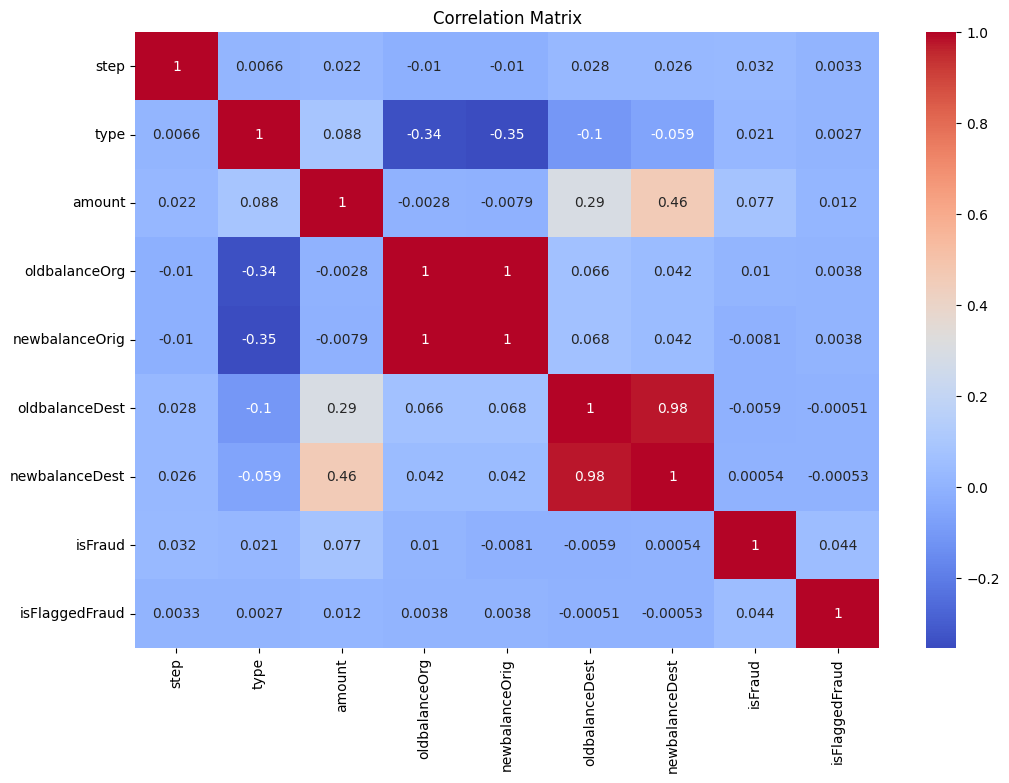

In [13]:
print(data.isnull().sum())

# Assuming median imputation for numerical columns
data.fillna(data.median(), inplace=True)

# 3. Correlation Matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [14]:
X=data.drop('isFraud',axis=1)
y=data['isFraud']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=16)
logreg.fit(X_train,y_train)
y_pred_logreg=logreg.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_logreg))
print(accuracy_score(y_test,y_pred_logreg))
print(classification_report(y_test,y_pred_logreg))

[[1270810      73]
 [    944     697]]
0.9992008009279196
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270883
           1       0.91      0.42      0.58      1641

    accuracy                           1.00   1272524
   macro avg       0.95      0.71      0.79   1272524
weighted avg       1.00      1.00      1.00   1272524



In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred_knn= knn.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_knn))
print(accuracy_score(y_test,y_pred_knn))
print(classification_report(y_test,y_pred_knn))

[[1270854      29]
 [    598    1043]]
0.9995072784481864
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270883
           1       0.97      0.64      0.77      1641

    accuracy                           1.00   1272524
   macro avg       0.99      0.82      0.88   1272524
weighted avg       1.00      1.00      1.00   1272524



In [18]:
from sklearn.tree import DecisionTreeClassifier
import joblib  # Import joblib for saving the model

dtree= DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred_dt= dtree.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_dt))
print(accuracy_score(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))

# Save the model using joblib
joblib.dump(dtree, 'my_model.joblib')

[[1270694     189]
 [    200    1441]]
0.9996943083195288
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270883
           1       0.88      0.88      0.88      1641

    accuracy                           1.00   1272524
   macro avg       0.94      0.94      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



['my_model.joblib']

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier= RandomForestClassifier(n_estimators=10)
rf_classifier.fit(X_train,y_train)
y_pred_rf= rf_classifier.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_rf))
print(accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

[[1270859      24]
 [    346    1295]]
0.9997092392756443
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270883
           1       0.98      0.79      0.88      1641

    accuracy                           1.00   1272524
   macro avg       0.99      0.89      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



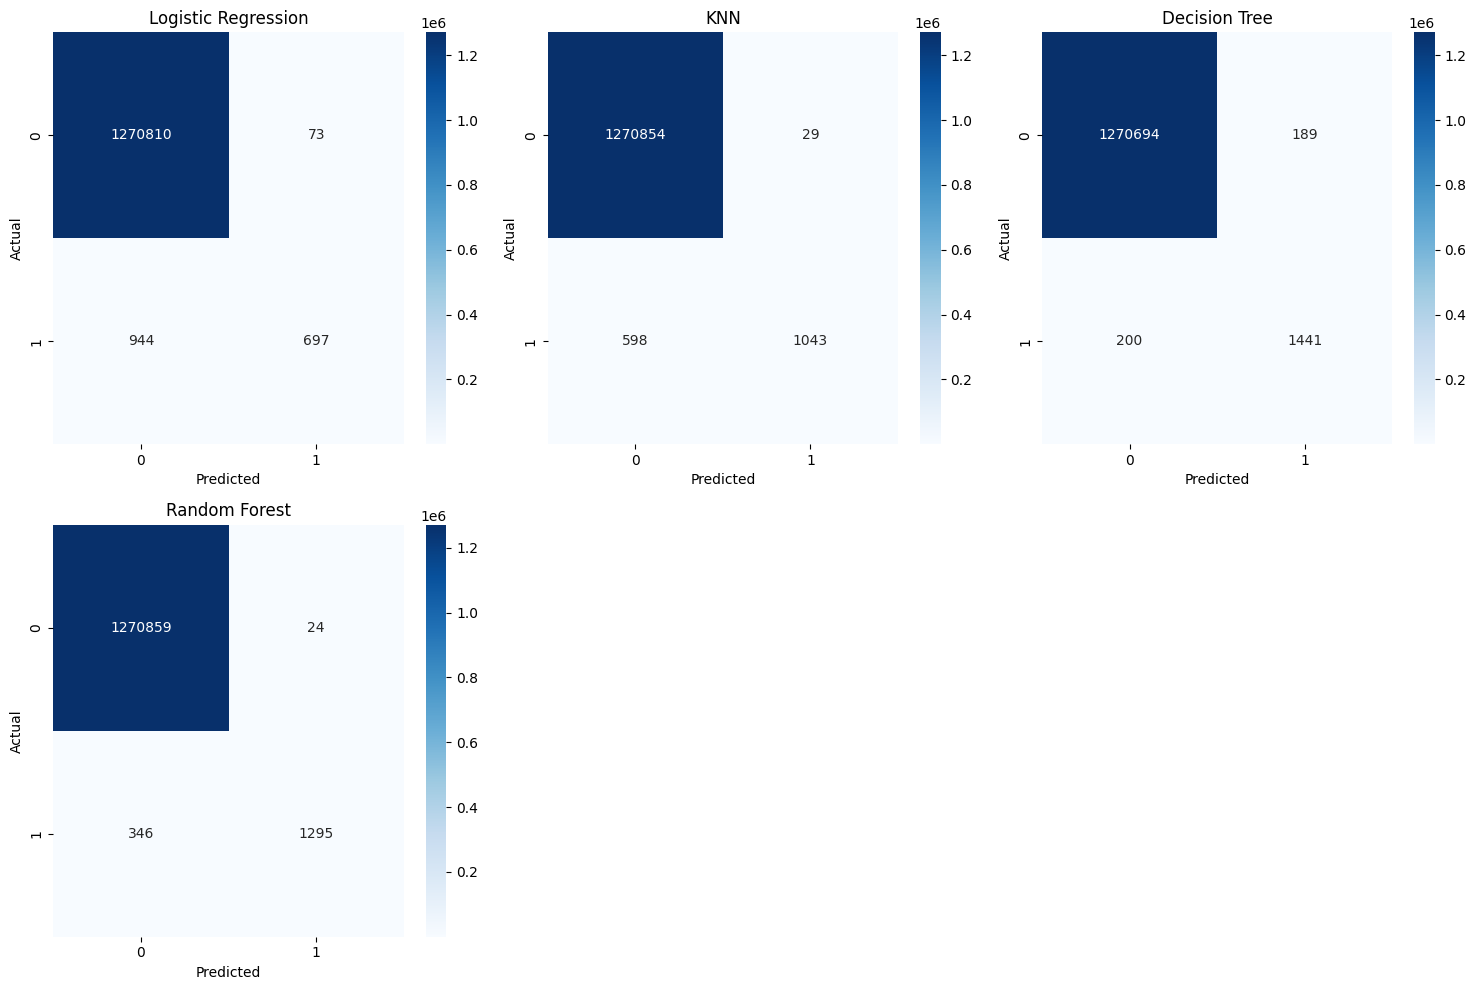

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test, y_pred_logreg, y_pred_knn, y_pred_svm, y_pred_dt, y_pred_rf are defined

models = ['Logistic Regression', 'KNN' , 'Decision Tree', 'Random Forest']
predictions = [y_pred_logreg, y_pred_knn, y_pred_dt, y_pred_rf]

plt.figure(figsize=(15, 10))

for i in range(len(models)):
    plt.subplot(2, 3, i+1)
    cm = confusion_matrix(y_test, predictions[i])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(models[i])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()


In [22]:
# Feature Importance from RandomForest
importances = rf_classifier.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Selecting top 5 features based on importance
selected_features = feature_importance.index[:5]
print("\nSelected Features for the Model:")
print(selected_features)



Feature Importance:
newbalanceDest    0.298138
oldbalanceOrg     0.276588
amount            0.174992
step              0.099536
oldbalanceDest    0.073382
type              0.043365
newbalanceOrig    0.033533
isFlaggedFraud    0.000467
dtype: float64

Selected Features for the Model:
Index(['newbalanceDest', 'oldbalanceOrg', 'amount', 'step', 'oldbalanceDest'], dtype='object')


Data Cleaning:

Missing Values: Missing values were handled using median imputation for numerical columns.
Outliers: Outliers were identified using the IQR method and removed from the dataset for each feature.
Multi-collinearity: A correlation matrix was plotted using a heatmap to visually inspect the correlation between features.
Fraud Detection Model: Several models were used for fraud detection:

Logistic Regression
K-Nearest Neighbors (KNN)
Decision Tree
Random Forest
Each model was trained on the preprocessed data, and predictions were made on the test set.

Variable Selection: No specific variable selection technique was used. All features were included in the models. However, feature importances were extracted from the Random Forest model to identify the top contributing features.

Model Performance: Performance of each model was evaluated using:

Confusion Matrix: To visualize true positives, true negatives, false positives, and false negatives.
Accuracy Score: To measure the overall correctness of predictions.
Classification Report: To provide precision, recall, F1-score, and support for each class (fraudulent and non-fraudulent).
Key Factors for Fraudulent Customers: The top 5 features identified by the Random Forest model as most important for predicting fraud were printed. Execute the code to see the output.

Prevention with Infrastructure Updates:
Robust Authentication: Implement multi-factor authentication and strong password policies.
Real-time Monitoring: Use anomaly detection systems to identify unusual patterns and trigger alerts.
Machine Learning Models: Integrate the developed fraud detection model into the transaction processing system to flag suspicious transactions.
Secure Data Storage: Encrypt sensitive data and implement access controls to prevent unauthorized access.
Evaluating Effectiveness:
Monitor Fraud Metrics: Track key metrics like the number of fraudulent transactions, the amount of money lost to fraud, and the percentage of fraudulent transactions detected.
A/B Testing: Conduct experiments to compare the performance of the updated system with the old one.
Feedback Loop: Establish a feedback mechanism to gather insights from users and fraud investigators to continuously improve the system.
